### Step 0 : Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### Step 1 : Data Composition

In [2]:
df_raw = pd.read_csv("DIABETES.csv")
df_raw.head(5)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


#### Detecting Missing value and Outlier

In [3]:
# Detecting Missing value

df_raw.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [4]:
df_raw.isna().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [5]:
# Detecting Outlier

In [6]:
len(list(df_raw))

11

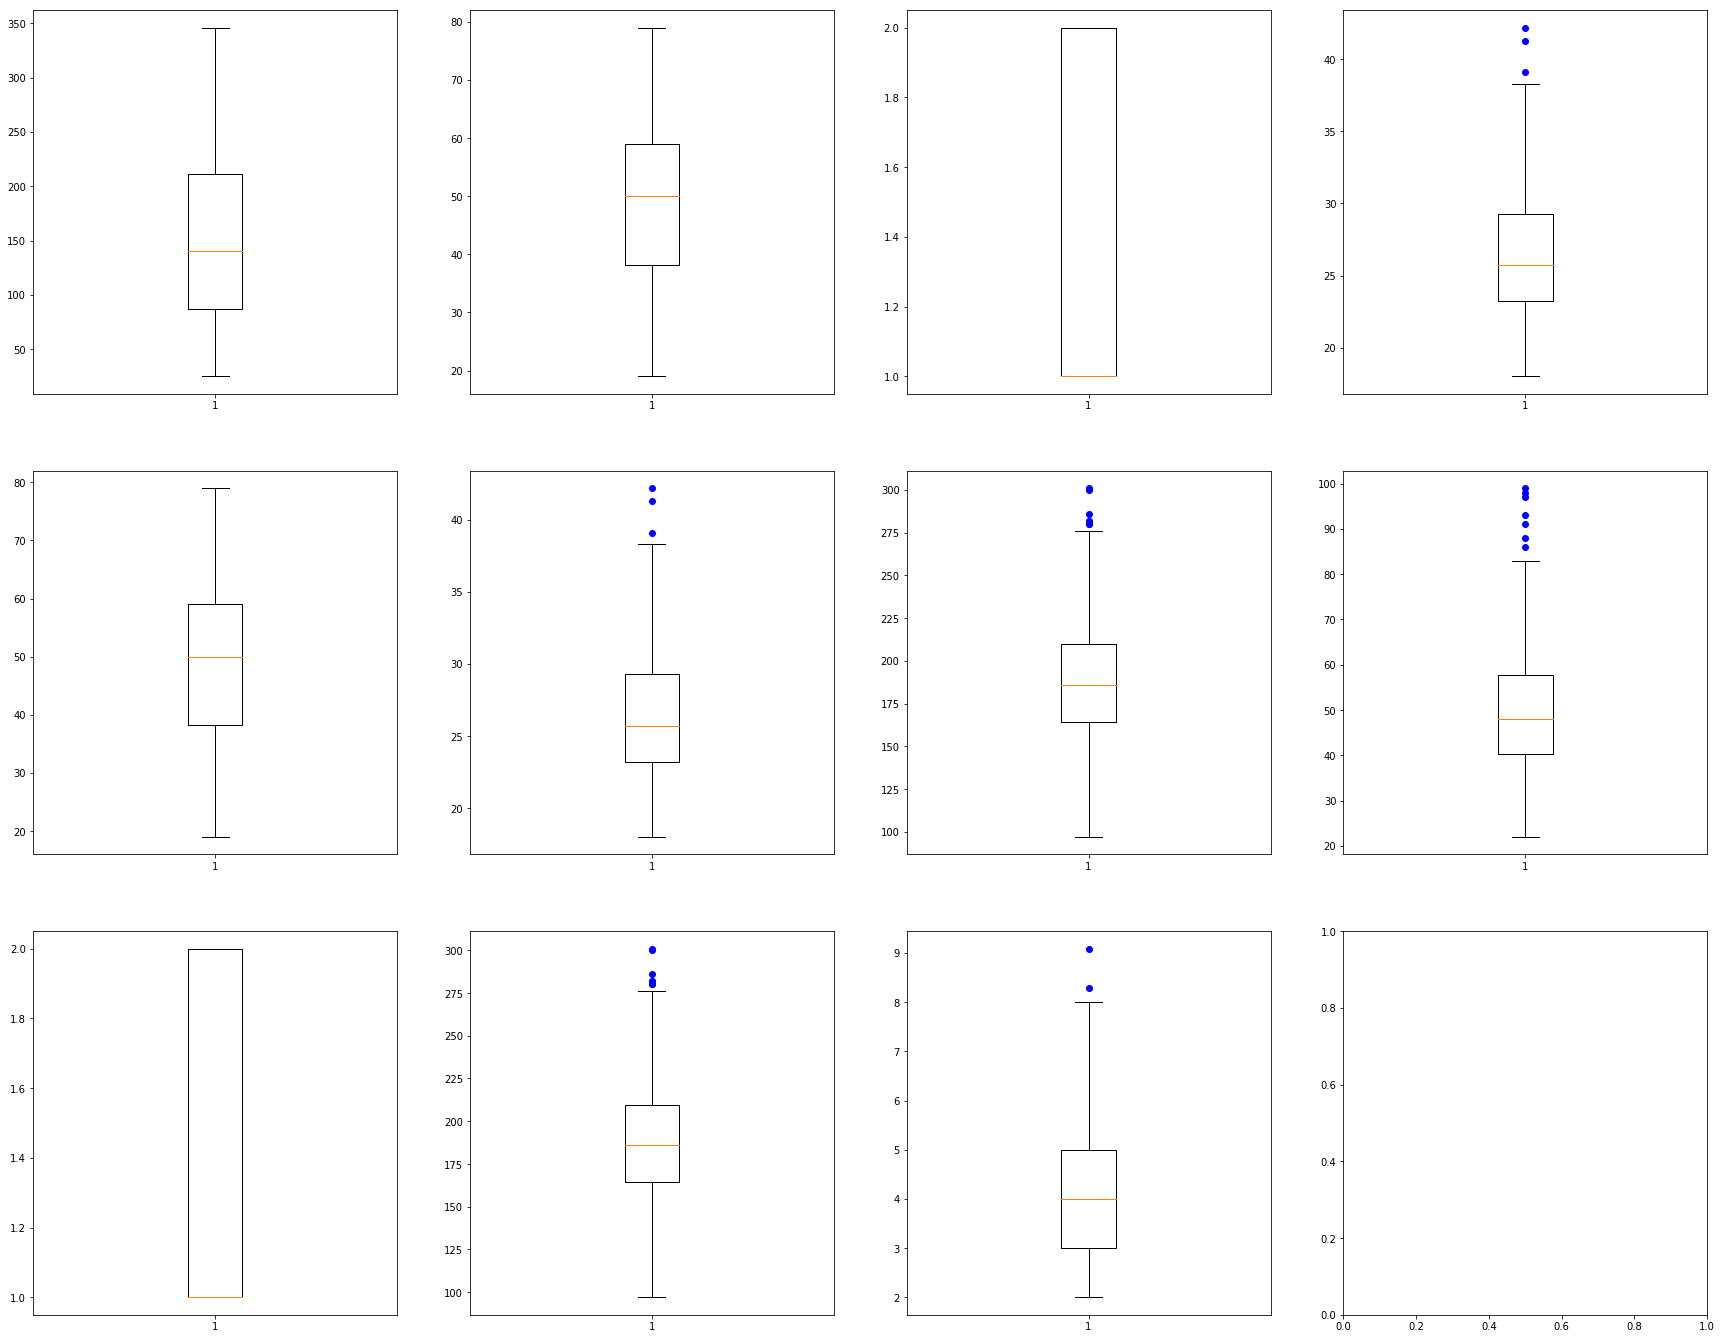

In [8]:
# Outlier Detection using Boxplot 
# Drawing boxplot frame. Length of df_raw =11, 3*4 matrix give frame with 1 waste.

f, ax = plt.subplots(3, 4, figsize=(30, 24))

# Using for loop, drawing boxplot by cell

for i in range (3):
    for j in range (1, 5):
        if (i*j+j-1 < 11):
            ax[i, j-1].boxplot(df_raw.iloc[:,i*j+j-1], sym="bo")
plt.show()

## Need to change, not intuitive

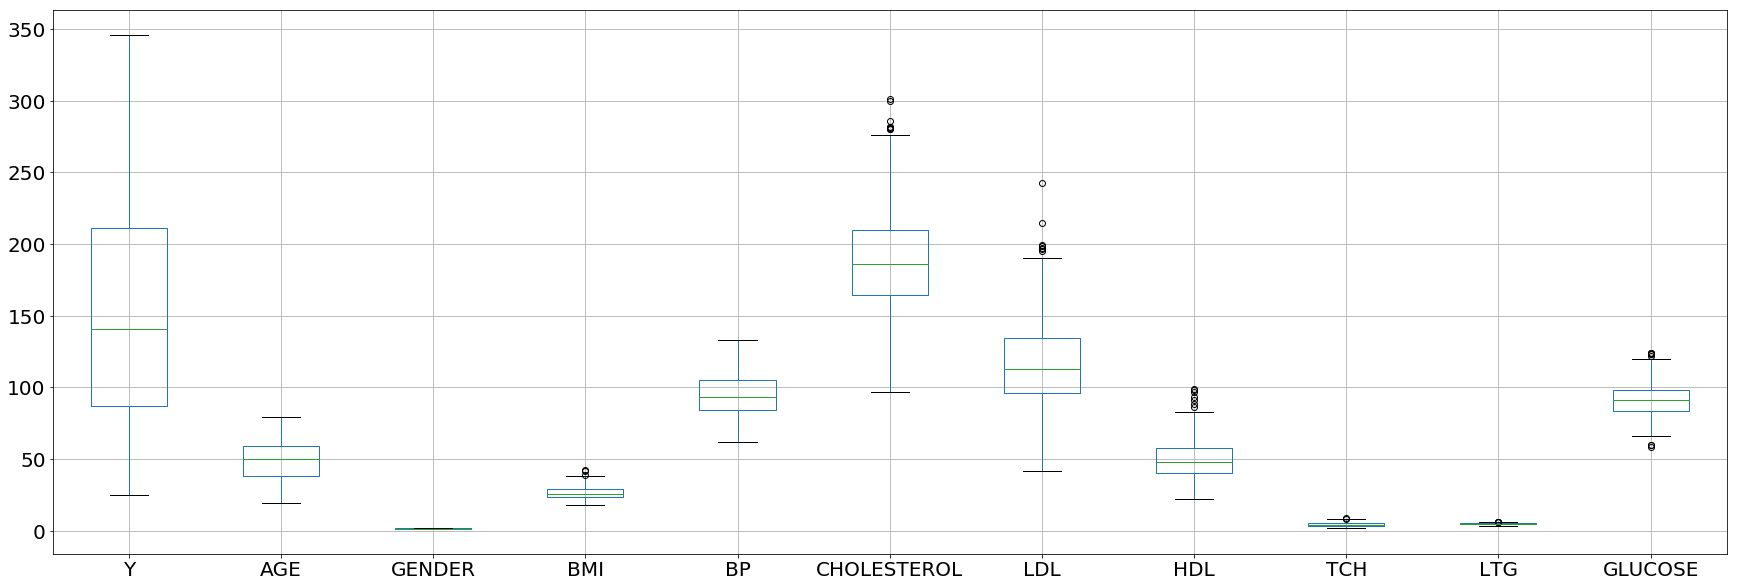

In [34]:
df_raw.boxplot(column = list(df_raw), figsize = (30, 10), fontsize=(20))

In [36]:
for i in range(1, 11, 1):
    num1, num2 = np.percentile(df_raw.iloc[:,[i]], [25, 75])
    iqr_max = num2 + 1.5 * (num2- num1)
    iqr_min = num1 - 1.5 * (num2- num1)
    for j in range(0, len(df_raw.iloc[:,[i]])) :
        if (df_raw.iloc[j,i] > iqr_max):
            df_raw.iloc[j,i] = iqr_max
        elif (df_raw.iloc[j,i] < iqr_min) :
            df_raw.iloc[j,i] = iqr_min

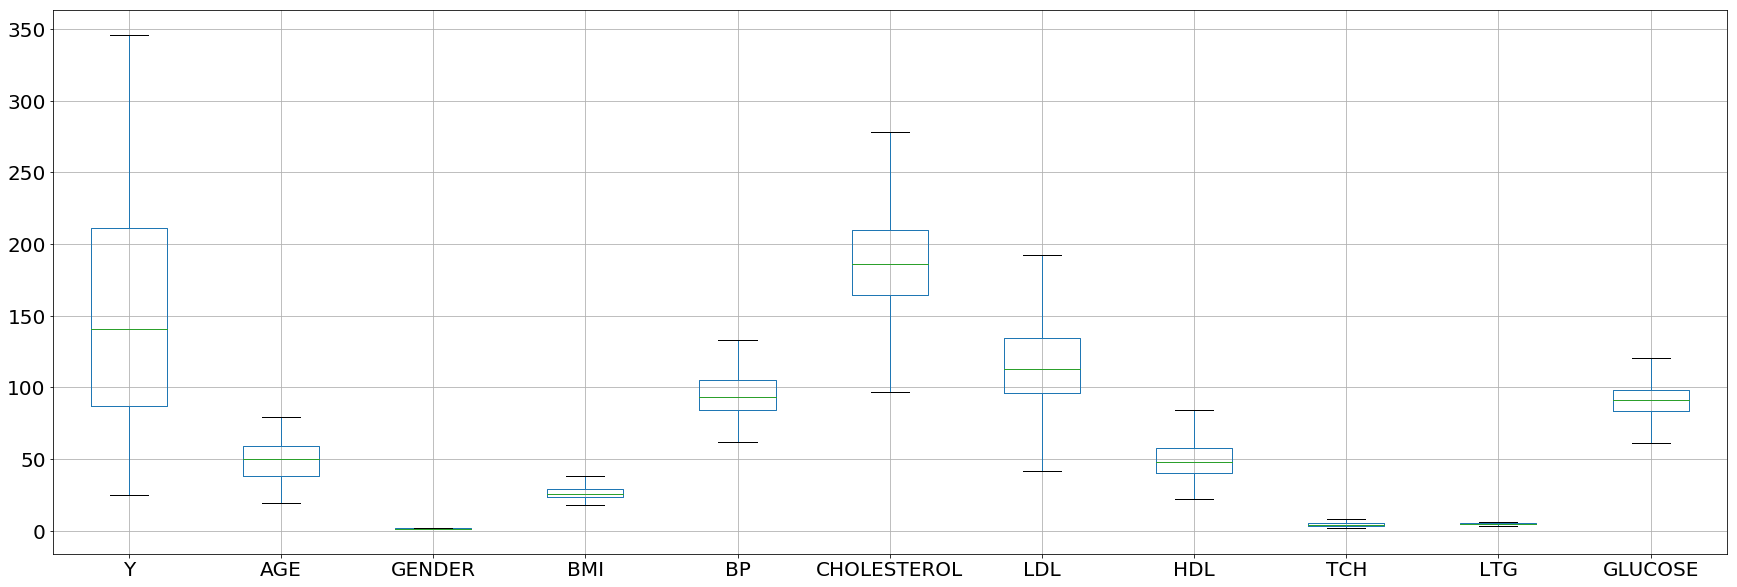

In [37]:
df_raw.boxplot(column = list(df_raw), figsize = (30, 10), fontsize=(20))

In [39]:
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [40]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 1234)

In [41]:
print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}".format(df_test_y.shape))

Train data X size	: (309, 10)
Train data Y size	: (309,)
Test data X size	: (133, 10)
Test data Y size	: (133,)


In [43]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set\t:%.3f" %(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set\t:%.3f" %(tree_uncustomized.score(df_test_x, df_test_y)))


Score on training set	:1.000
Score on test set	:-0.135


In [44]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [45]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range (1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [46]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.135
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


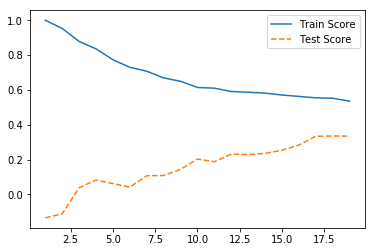

In [47]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [48]:
from sklearn.tree import export_graphviz

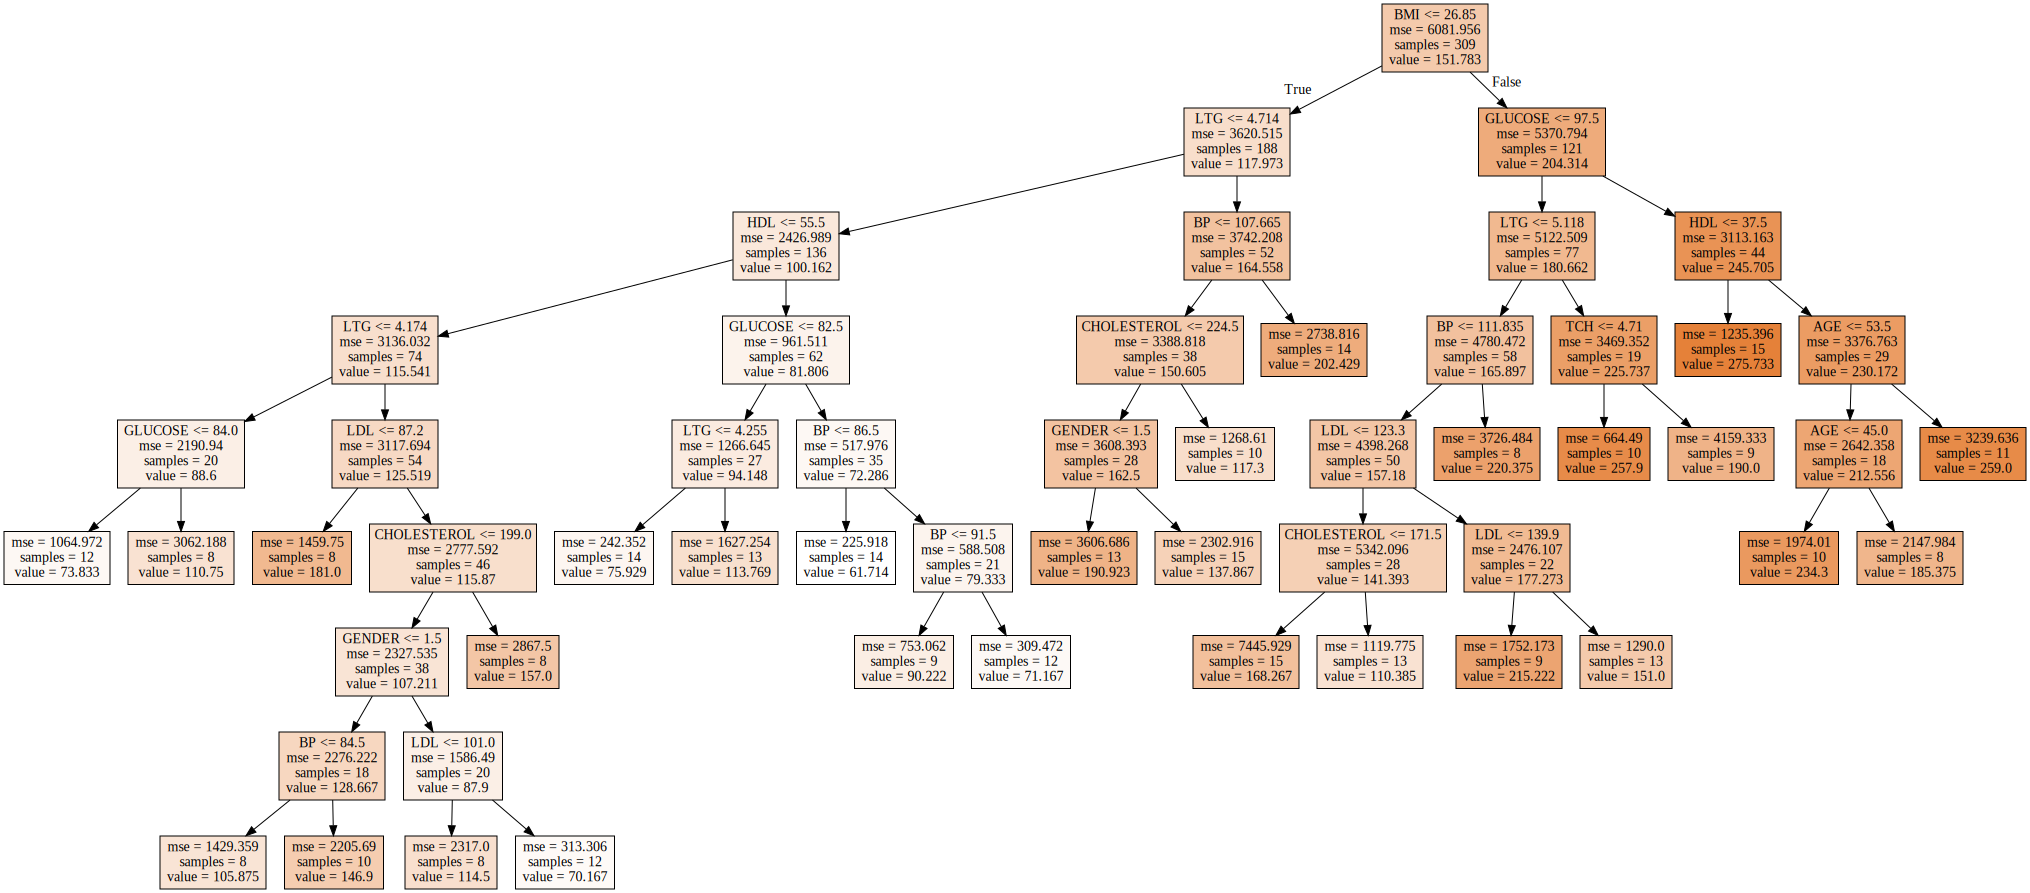

In [49]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)


with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

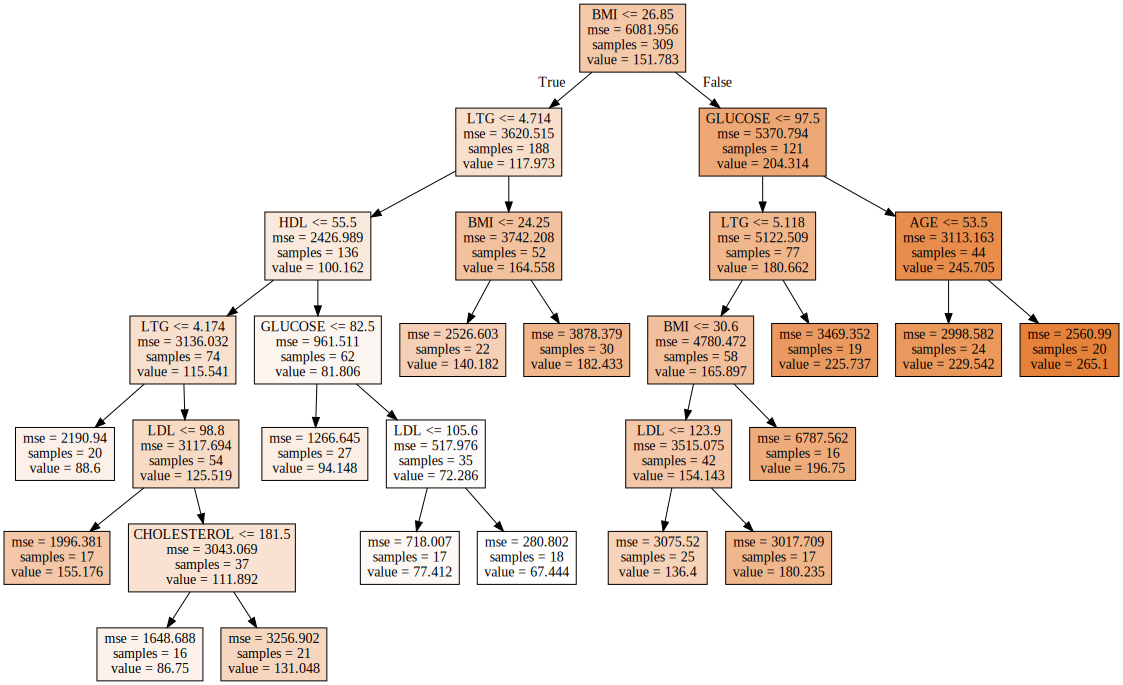

In [50]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)


with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [51]:
train_score = []; test_score = []
para_split = [n_leaf * 2 for n_leaf in range (2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.669,0.109
1,6,0.669,0.109
2,8,0.669,0.109
3,10,0.669,0.109
4,12,0.669,0.109
5,14,0.669,0.109
6,16,0.669,0.109
7,18,0.669,0.109
8,20,0.648,0.142
9,22,0.638,0.166


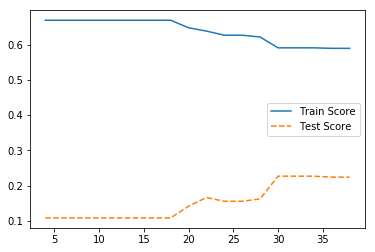

In [53]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()